<a href="https://colab.research.google.com/github/nithya-bharadwaj/Person-Identification-using-Periocular-Region-along-with-anti-spoofing/blob/nithya/extractFrames.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

pip install --upgrade mediapipe opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.6/35.6 MB 38.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 12.7 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


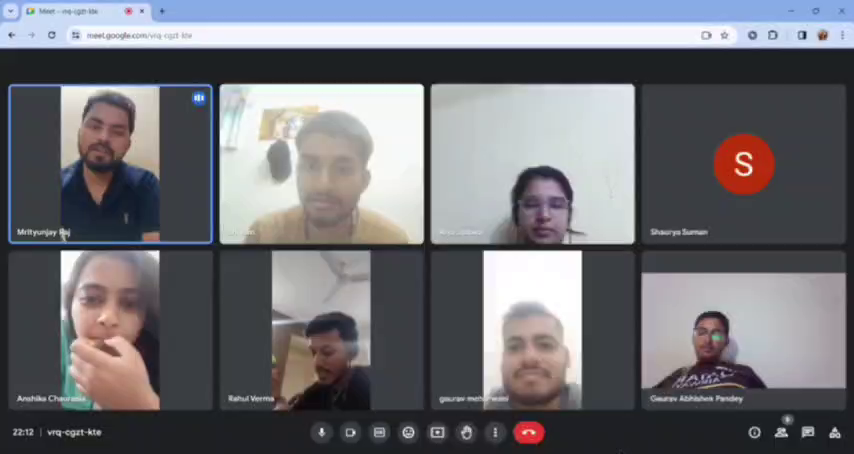

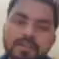

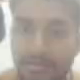

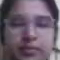

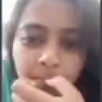

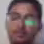

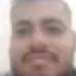

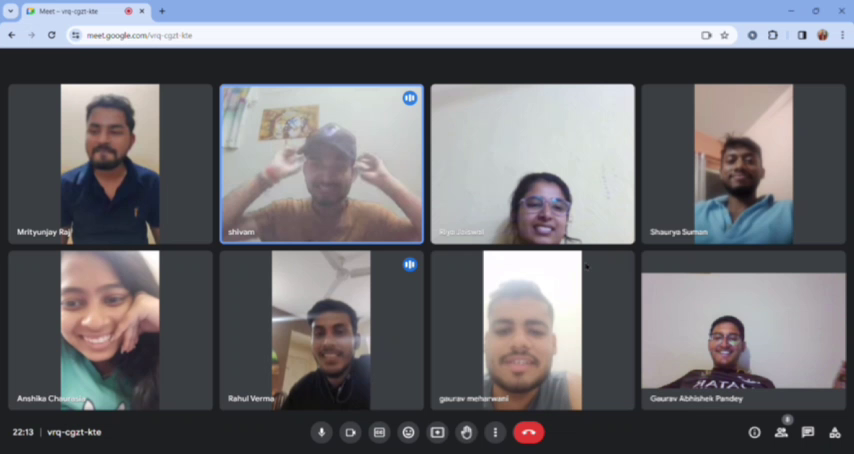

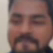

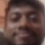

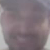

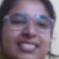

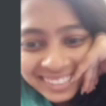

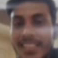

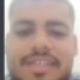

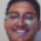

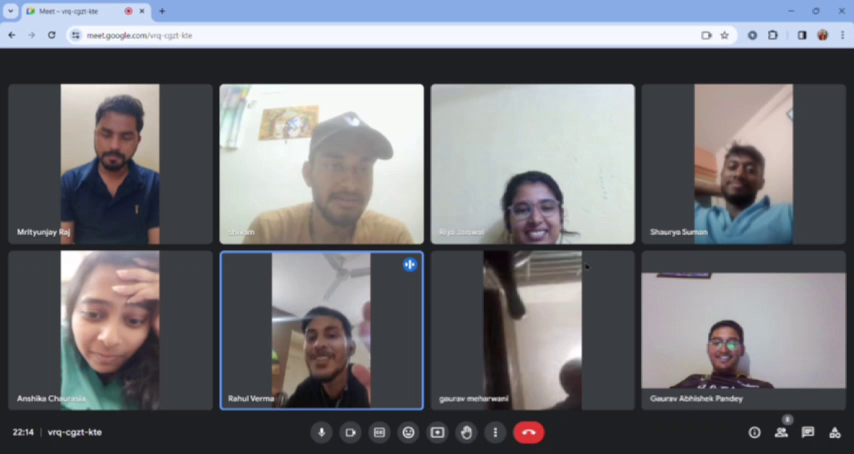

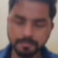

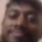

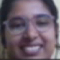

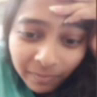

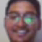

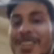

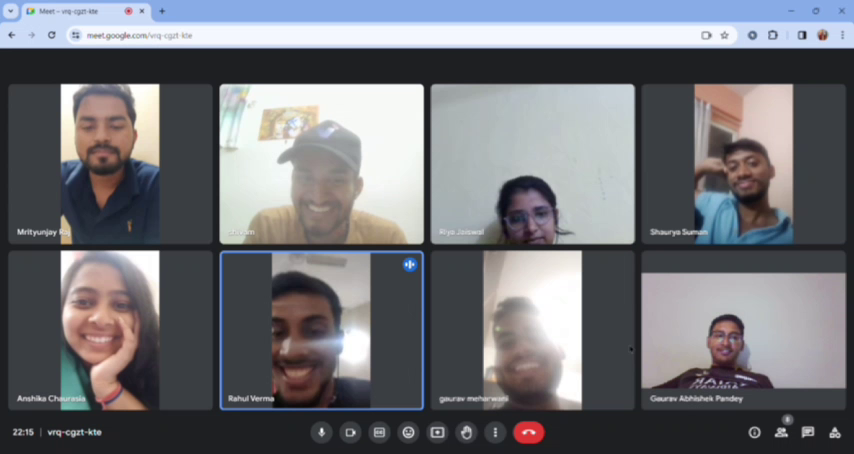

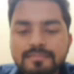

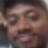

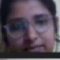

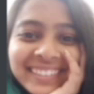

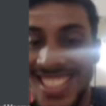

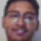

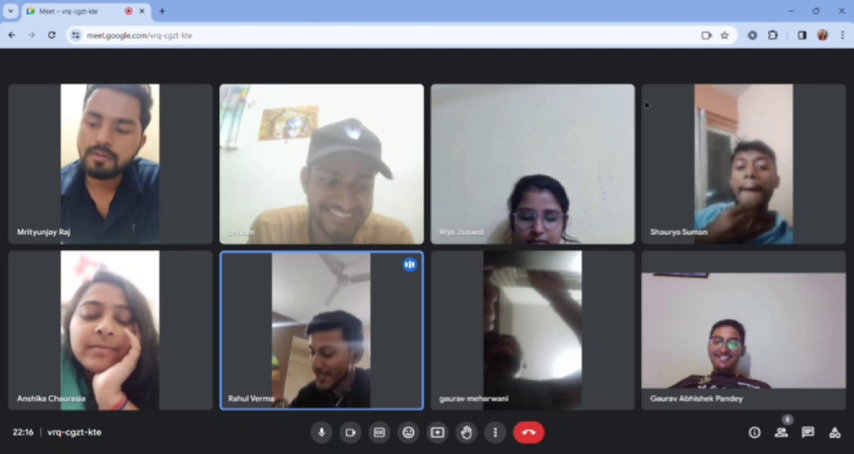

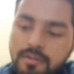

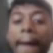

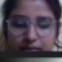

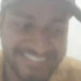

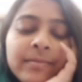

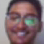

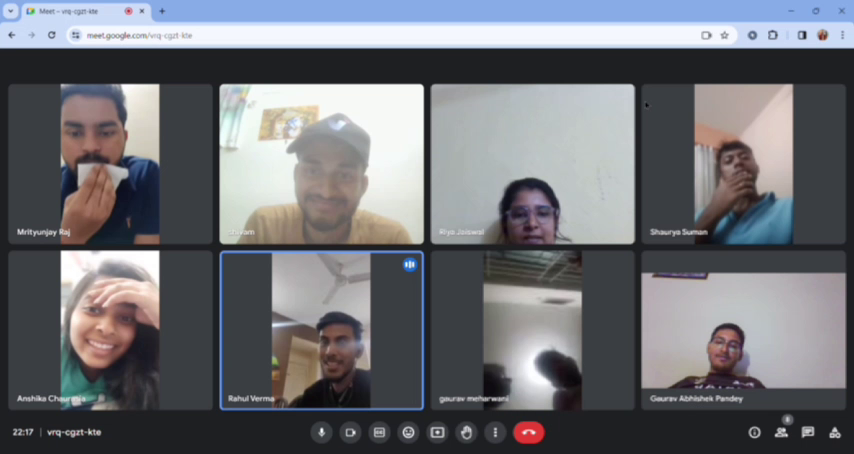

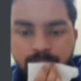

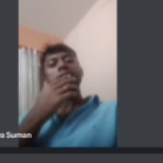

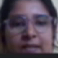

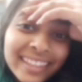

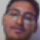

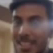

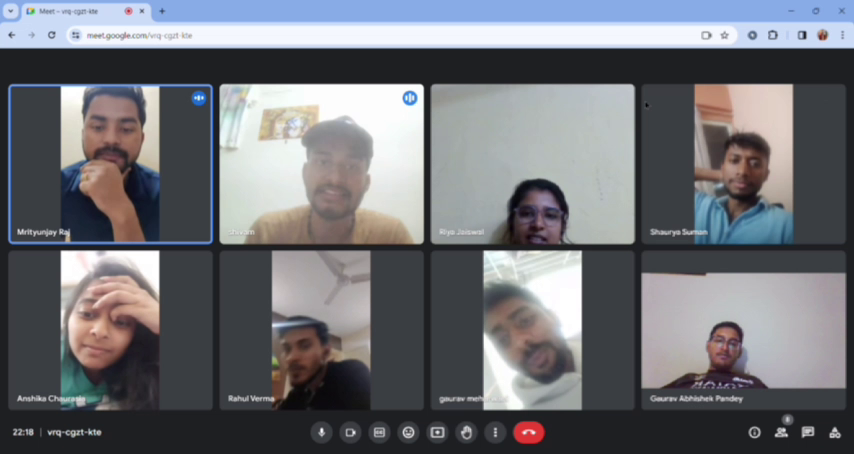

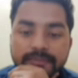

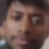

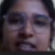

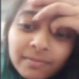

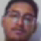

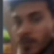

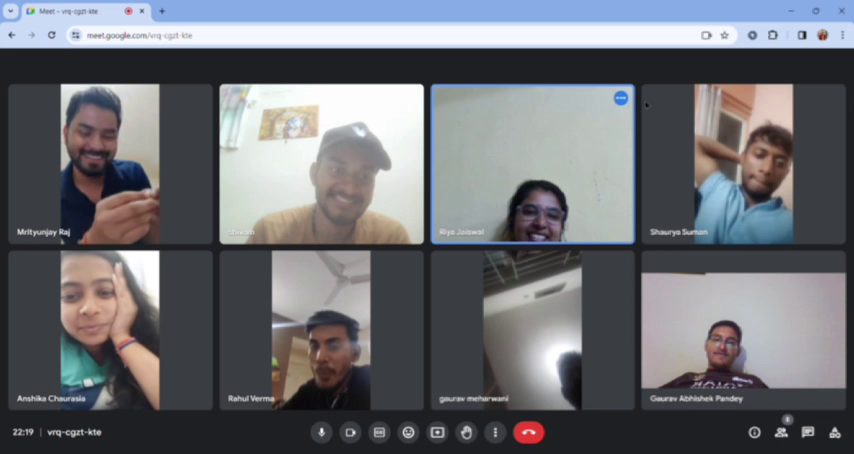

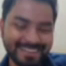

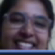

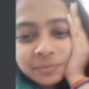

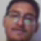

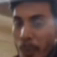

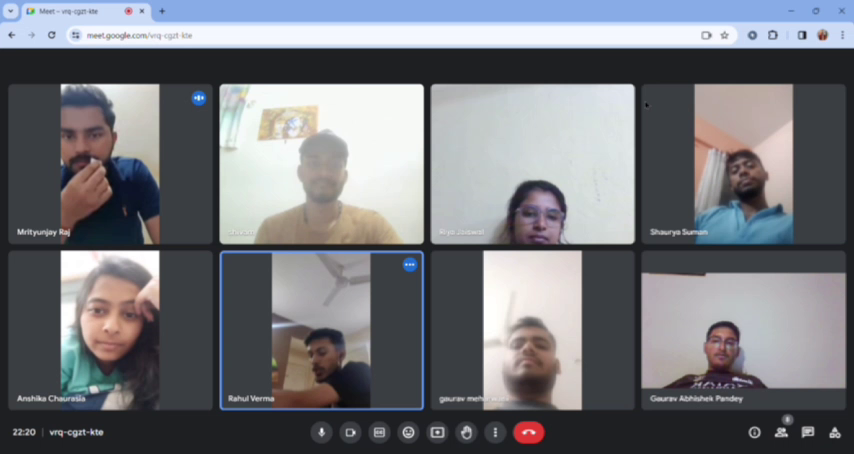

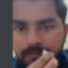

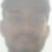

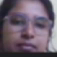

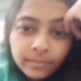

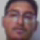

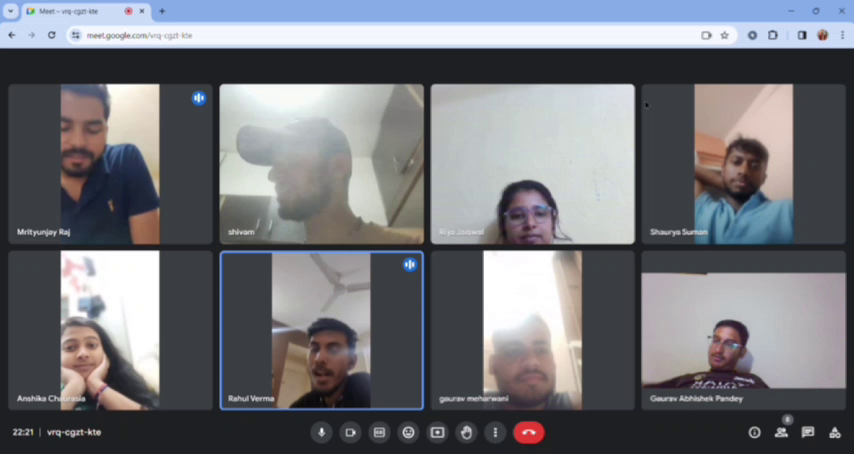

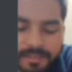

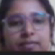

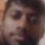

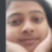

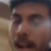

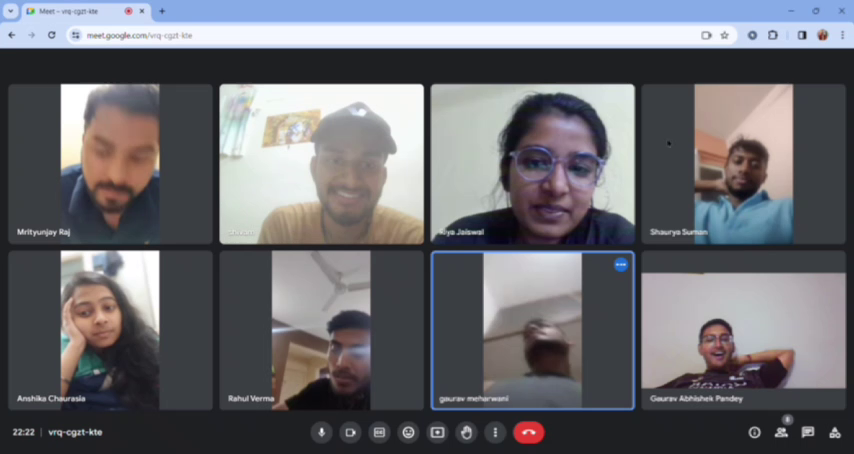

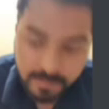

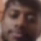

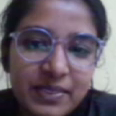

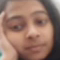

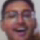

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the pre-trained model for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

def detect_and_process_faces(frame):
    # Convert frame to grayscale (required for Haar cascade)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the image
    faces = face_cascade.detectMultiScale(gray, 1.1, 2)

    # Loop over the faces
    for (x, y, w, h) in faces:
        # Extract the face from the frame
        face = frame[y:y+h, x:x+w]

        # Pass the face to another function for further processing
        process_face(face)


def process_face(face):
    # Placeholder function for processing a single face
    # For example, save the face image or perform recognition
    cv2_imshow(face)
    cv2.waitKey(0)

# Function to extract frames and detect & crop faces
def extract_and_crop_faces(video_path, interval=40):

    # Load the video
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = 0

    while cap.isOpened():
            success, frame = cap.read()
            if not success:
              break



            # Extract frames at the specified interval
            if frame_count % (fps * interval) == 0:
               cv2_imshow(frame)
               detect_and_process_faces(frame)

            frame_count += 1
    cap.release()

# Example usage
video_path = '/content/drive/My Drive/Project/meet1.mp4'
extract_and_crop_faces(video_path, interval=60)
